<a href="https://colab.research.google.com/github/harnalashok/CatEncodersFamily/blob/main/demo_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## demo_sample


In [ ]:
# Last amended: 20th July, 2023

## Basics

In [1]:
!pip install catencfamily==0.0.87

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.5 MB/s eta 0:00:00


In [15]:
# 1.0 Call libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from catencfamily.encoders import CatEncodersFamily
from catencfamily import utils

In [11]:
# 2.0
data = pd.DataFrame(
                     {
                      "xa" : ['a', 'b', 'c', 'b', 'c', 'd','d','d','e'],
                      "xb" : ['t','t','t','u','v','v','w','z','z'],
                      "xc" : [1.2,2.3,3.2,4.5,0.1,0.8,6.7,3.4, 1.1]
                     }
                    )
data

,xa,xb,xc
0,a,t,1.2
1,b,t,2.3
2,c,t,3.2
3,b,u,4.5
4,c,v,0.1
5,d,v,0.8
6,d,w,6.7
7,d,z,3.4
8,e,z,1.1


In [3]:
# 2.1 Read breastcancer Data:

#data = pd.read_csv("/content/sample_data/demo_sample.csv")
#data

,xa,xb,xc
0,a,t,1.30
1,b,t,2.40
2,c,t,1.15
3,b,u,2.09
4,c,v,2.10
5,d,v,3.10
6,d,w,2.70
7,d,z,1.90
8,e,z,0.12


## Instantiation and fitting

In [12]:
# 3.0 Instantiate and fit CatEncodersFamily class:

cat_cols = ['xa', 'xb']
interactingCatCols = cat_cols
ct = CatEncodersFamily(
                       cMeasures=[1,1,1,1,None,1,1],
                       saveGraph = True,
                       cutoff = 2
                       )

# 3.1 Fit it


ct.fit(data, cat_cols, interactingCatCols)

Folder  /content/allmodels/models created to deposit cat encoder models and graph related files
Record set no is 1  
Set of records is:  [('xa', 'xb', [1, 1, 1, 1, None, 1, 1]), ('xa', 'xa_p_xb', [1, 1, 1, 1, None, 1, 1]), ('xb', 'xa', [1, 1, 1, 1, None, 1, 1]), ('xb', 'xa_p_xb', [1, 1, 1, 1, None, 1, 1])]



Next:  1  of  4 xa xb
No of unique values in  xa  are:  5
Bipartite Network created. Time taken:  6.27438227335612e-05 minutes
Bipartite Network projected. Time taken:  2.8030077616373697e-05 minutes
Calculating betweenness centrality with k = All nodes
Betweenness centrality calculated
Model extracted. Time taken:  0.0022050182024637857 minutes
Model saved
Done with xa  and  xb
Time taken:  0.002494204044342041
Entry made in file progress.csv



Next:  2  of  4 xa xa_p_xb
No of unique values in  xa  are:  5
Bipartite Network created. Time taken:  6.367762883504231e-05 minutes
Bipartite Network projected. Time taken:  2.7489662170410156e-05 minutes
Calculating betweenness centrali

CatEncodersFamily(cMeasures=[1, 1, 1, 1, None, 1, 1], cutoff=2,
                  modelsPath=PosixPath('/content/allmodels/models'),
                  pathToStoreProgress=PosixPath('/content/allmodels/progress'),
                  saveGraph=True)

## Data transformation:

In [13]:
# 4.0 Transform data now:

data_trans= ct.transform(data[cat_cols])

f"Transformed train data shape: {data.shape}"



====Reading all model-dicts from RAM


====All saved model-dicts read! Model files are intact!
====Total model-dict are:  20
====Sending model loading progress to file: /content/allmodels/progress/load_stored_models.txt
When loading is in progress, open this file with notepad++ AND NOT with notepad


Current mem usage is: 0.00108 MB
Mem usage after dtype transformation is: 0.000648 MB


'Transformed train data shape: (9, 3)'

Our new features are substantially difft from original features. Prefixes to feature names imply as below:
<i>
>deg_ ===> This feature results from calculation of degree centrality<br>
>eig_ ===> This feature results from calculation of eigenvector centrality<br>
>pr_  ===> This feature results from calculation of page rank centrality<br>
>bet_ ===> This feature results from calculation of betweenness centrality<br>
>clu_ ===> This feature results from calculation of clustering characteristics<br>,</i>


In [14]:
# 4.1 Observe data now:
#     It also has original binned cols (5):

data_trans

,xa,xb,deg_xa_ck_xb,eig_xa_ck_xb,pr_xa_ck_xb,clu_xa_ck_xb,bet_xa_ck_xb,eig_xa_ck_xa_p_xb,deg_xb_ck_xa,eig_xb_ck_xa,pr_xb_ck_xa,clu_xb_ck_xa,bet_xb_ck_xa,eig_xb_ck_xa_p_xb
0,a,t,0.50,0.497154,0.191822,1.000000,0.000000,-0.393967,0.50,0.342485,0.212600,0.000000,0.500000,0.710217
1,b,t,0.50,0.497154,0.191822,1.000000,0.000000,-0.275787,0.50,0.342485,0.212600,0.000000,0.500000,0.710217
2,c,t,0.75,0.603704,0.283402,0.333333,0.666667,0.809490,0.50,0.342485,0.212600,0.000000,0.500000,0.710217
3,b,u,0.50,0.497154,0.191822,1.000000,0.000000,-0.275787,0.25,0.154668,0.120354,0.000000,0.000000,0.502258
4,c,v,0.75,0.603704,0.283402,0.333333,0.666667,0.809490,0.75,0.603704,0.283402,0.333333,0.666667,-0.333314
5,d,v,0.50,0.342485,0.212600,0.000000,0.500000,0.334479,0.75,0.603704,0.283402,0.333333,0.666667,-0.333314
6,d,w,0.50,0.342485,0.212600,0.000000,0.500000,0.334479,0.50,0.497154,0.191822,1.000000,0.000000,0.032976
7,d,z,0.50,0.342485,0.212600,0.000000,0.500000,0.334479,0.50,0.497154,0.191822,1.000000,0.000000,-0.362136
8,e,z,0.25,0.154668,0.120354,0.000000,0.000000,0.039769,0.50,0.497154,0.191822,1.000000,0.000000,-0.362136


## Graphs

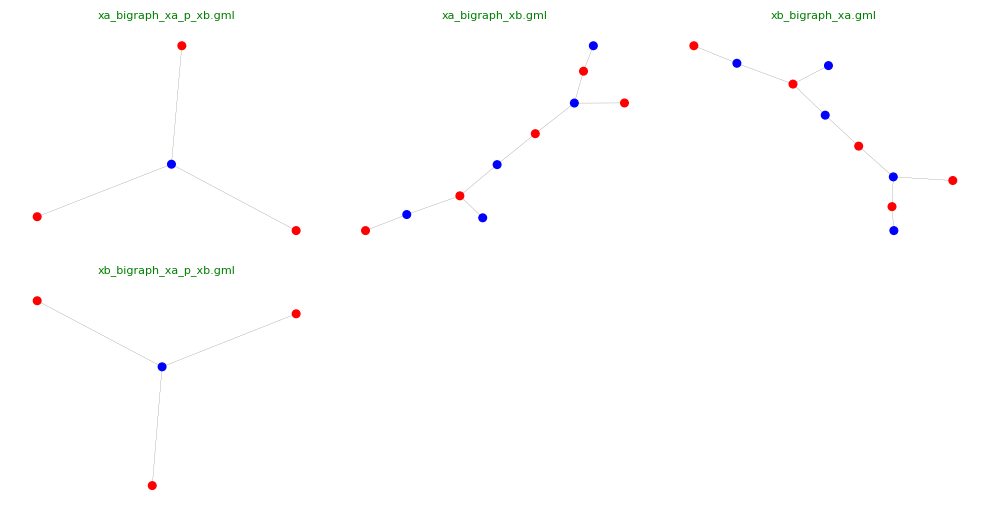

In [23]:
# 5.1 Plot of sample bigraphs:
bigraphs = ['xa_bigraph_xa_p_xb.gml', 'xa_bigraph_xb.gml', 'xb_bigraph_xa.gml', 'xb_bigraph_xa_p_xb.gml']
plt.style.use('default')
pathToFolder = Path("/content/allmodels/models")
pos = 1
fig = plt.figure(figsize=(10,18));
for bi in bigraphs:
    ax = fig.add_subplot(7,3,pos);
    pos = pos + 1
    # Only show connedted nodes
    _=utils.plotBipartiteGraph(bi,
                               pathToFolder,
                               ax = ax,
                               title = bi,
                               connected = True);
    plt.tight_layout();

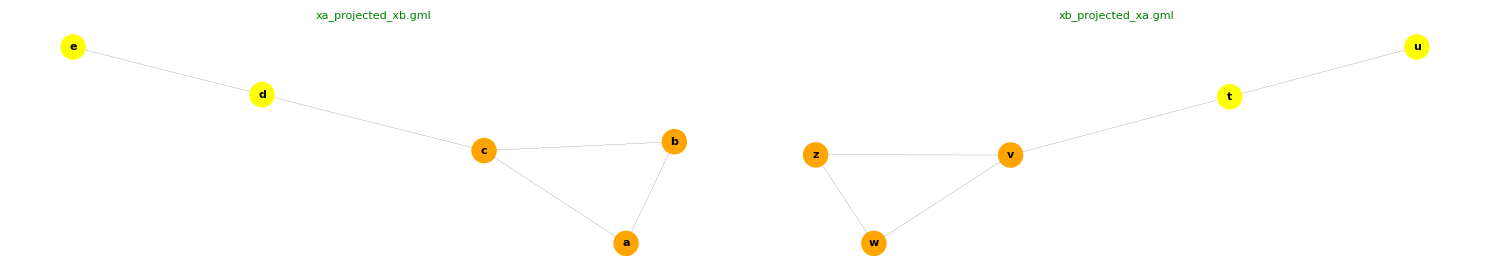

In [27]:
# 5.2 Plot of  projected graph files
projected = [ 'xa_projected_xb.gml', 'xb_projected_xa.gml']
plt.style.use('default')
pos = 1
fig = plt.figure(figsize=(15,18));
for prj in projected:
    ax = fig.add_subplot(7,2,pos);
    pos = pos + 1
    # Only show connected nodes
    _=utils.communityVisualization(prj,
                                   pathToFolder,
                                   ax = ax,
                                   withLabels = True,
                                   title = prj);
    plt.tight_layout();

In [ ]:
##################### DONE ####################